# 배열의 연산

## 벡터화 연산

앞서 NumPy가 벡터화 연산을 지원한다고 이야기하였다. 벡터화 연산을 쓰면 명시적으로 반복문을 사용하지 않고도 배열의 모든 원소에 대해 반복연산을 할 수 있다. 벡터화 연산의 또다른 장점은 선형 대수 공식과 동일한 아주 간단한 파이썬 코드를 작성할 수 있다는 점이다.

예를 들어 선형 대수에서 두 벡터의 합은 다음과 같이 구한다.

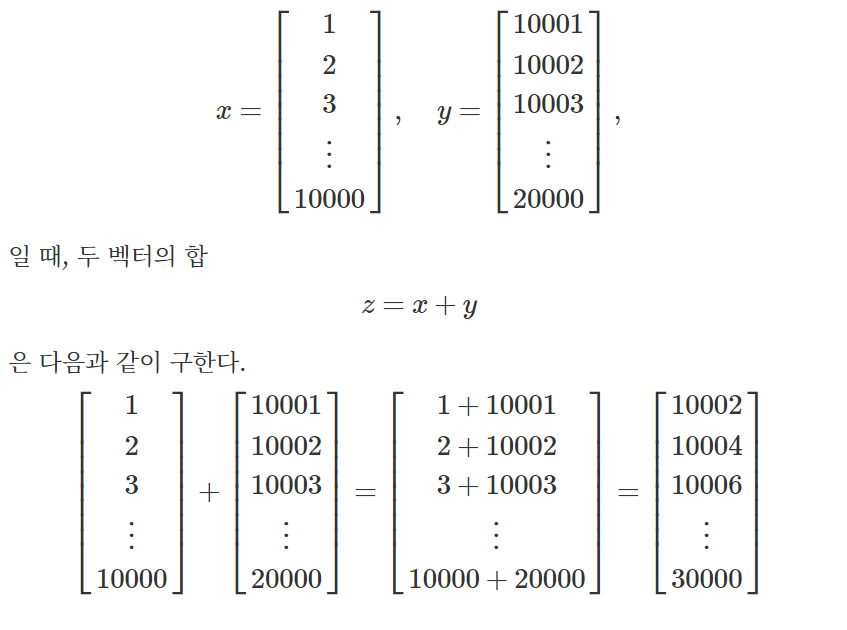

만약 벡터화 연산을 사용하지 않는다면 이 연산은 반복문을 사용하여 다음과 같이 만들어야 한다. 이 코드에서 `%%time`은 셀 코드의 실행시간을 측정하는 IPython의 매직 명령이다.

In [2]:
import numpy as np

In [15]:
x = np.arange(1, 10001)
y = np.arange(10001, 20001)

In [16]:
%%time
z = np.zeros_like(x)
for i in range(10000):
    z[i] = x[i] + y[i]

Wall time: 9.97 ms


In [17]:
z[:10]

array([10002, 10004, 10006, 10008, 10010, 10012, 10014, 10016, 10018,
       10020])

그러나 벡터화 연산을 사용하면 덧셈 연산 하나로 끝난다. 위에서 보인 선형대수의 벡터 기호를 사용한 연산과 결과가 완전히 동일하다. 연산 속도도 벡터화 연산이 훨씬 빠르다.

In [18]:
%%time
z = x + y

Wall time: 0 ns


In [19]:
z[:10]

array([10002, 10004, 10006, 10008, 10010, 10012, 10014, 10016, 10018,
       10020])

사칙 연산 뿐 아니라 비교연산과 같은 논리 연산도 벡터화 연산이 가능하다.

In [21]:
a = np.array([1,2, 3,4])
b = np.array([4, 2, 2, 4])

In [22]:
a == b

array([False,  True, False,  True])

In [23]:
a >= b

array([False,  True,  True,  True])

만약 배열의 각 원소들을 일일히 비교하는 것이 아니라 배열의 모든 원소가 다 같은지 알고 싶다면 `all`명령을 사용하면 된다.

In [24]:
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])

In [25]:
np.all(a==b)

False

In [26]:
np.all(a==c)

True

지수 함수, 로그 함수 등의 수학 함수도 벡터화 연산을 지원한다.

In [28]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [29]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [30]:
10 ** a

array([    1,    10,   100,  1000, 10000], dtype=int32)

In [31]:
np.log(a+1)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

## 스칼라와 벡터/행렬의 곱셈

스칼라와 벡터/행령의 곱도 선형 대수에서 사용하는 식과 NumPy 코드가 일치한다.

In [32]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
100 * x

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [34]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
100 * x

array([[   0,  100,  200,  300],
       [ 400,  500,  600,  700],
       [ 800,  900, 1000, 1100]])

## 브로드캐스팅

벡터(또는 행렬)끼리 덧셈 혹은 뺄셈을 하려면 두 벡터의 크기가 같아야 한다. NumPy에서는 서로 다른 크기를 가진 두 배열의 사칙 연산도 지원한다. 이 기능을 **브로드캐스팅**이라고 하는데 크기가 작은 배열을 자동으로 반복 확장하여 크기가 큰 배열에 맞추는 방법이다.

예를 들어 다음과 같이 벡터와 스칼라를 더하는 경우를 생각하자.

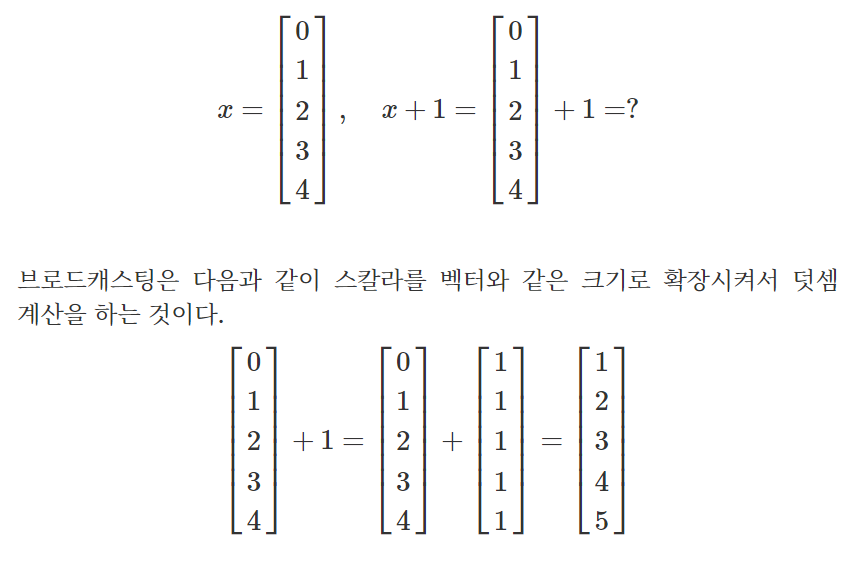

In [36]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [37]:
y = np.ones_like(x)
y

array([1, 1, 1, 1, 1])

In [38]:
x + y

array([1, 2, 3, 4, 5])

In [39]:
x + 1

array([1, 2, 3, 4, 5])

브로드 캐스팅은 다음처럼 더 차원이 높은 경우에도 적용된다.

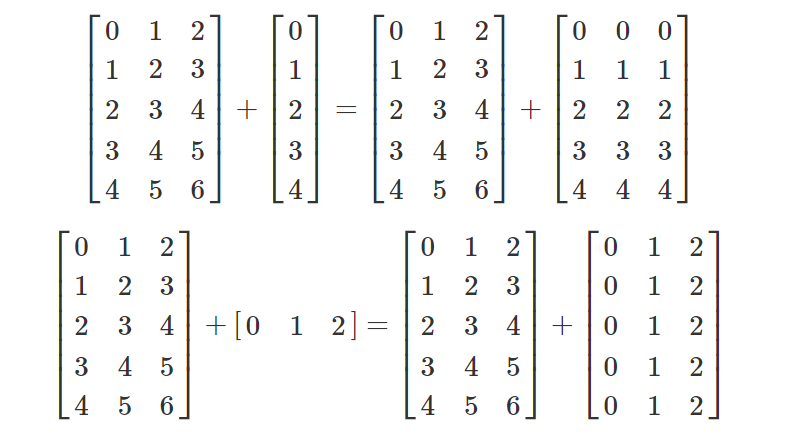

In [40]:
x = np.vstack([range(7)[i:i+3] for i in range(5)])
x

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [41]:
y = np.arange(5)[:, np.newaxis]
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [42]:
x+ y

array([[ 0,  1,  2],
       [ 2,  3,  4],
       [ 4,  5,  6],
       [ 6,  7,  8],
       [ 8,  9, 10]])

In [43]:
y = np.arange(3)
y

array([0, 1, 2])

In [44]:
x + y

array([[0, 2, 4],
       [1, 3, 5],
       [2, 4, 6],
       [3, 5, 7],
       [4, 6, 8]])

## 차원 축소 연산

행렬의 하나의 행에 있는 원소들을 하나의 데이터 집합으로 보고 그 집합의 평균을 구하면 각 행에 대해 하나의 숫자가 나오게 된다. 예를 들어 10x5 크기의 2차원 배열에 대해 행-평균을 구하면 10개의 숫자를 가진 1차원 벡터가 나오게 된다. 이러한 연산을 차원 축소 연산이라고 한다.

NumPy는 다음과 같은 차원 축소 연산 명령 혹은 메서드를 지원한다.

- 최대/최소: `min`, `max`, `argmin`, `argmax`
- 통계: `sum`, `mean`, `median`, `std`, `var`
- 불리언: `all`, `any`

In [45]:
x = np.array([1, 2, 3,4])
x

array([1, 2, 3, 4])

In [46]:
np.sum(x)

10

In [47]:
x.sum()

10

In [48]:
x = np.array([1, 3, 2])

In [49]:
x.min()

1

In [50]:
x.max()

3

In [51]:
x.argmin() #최솟값의 위치

0

In [52]:
x.argmax() #최댓값의 위치

1

In [55]:
x = np.array([1, 2, 3, 1])

In [56]:
x.mean()

1.75

In [57]:
np.median(x)

1.5

In [58]:
np.all([True, True, False])

False

In [59]:
np.any([True, True, False])

True

In [60]:
a = np.zeros((100, 100), dtype=np.int)
a

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [61]:
np.any(a!=0)

False

In [62]:
np.all(a == a)

True

In [63]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

In [65]:
((a <= b)  & (b <= c)).all()

True

연산의 대상이 2차원 이상인 경우에는 어느 차원으로 계산을 할지를 `axis` 인수를 사용하여 지시한다. `axis=0` 인 경우에는 열 연산, `axis=1`인 경우는 행연산이다. 디폴트값은 `axis=0`이다. `axis` 인수는 대부분의 차원 축소 명령에 적용할 수 있다.

In [66]:
x = np.array([[1, 1], [2, 2]])
x

array([[1, 1],
       [2, 2]])

In [67]:
x.sum()

6

In [68]:
x.sum(axis=0) #열합계

array([3, 3])

In [69]:
x.sum(axis=1) #행합계

array([2, 4])

### 연습문제 1

실수로 이루어진 5 x 6 형태의 데이터 행렬을 만들고 이 데이터에 대해 다음과 같은 값을 구한다.

1. 전체의 최댓값
2. 각 행의 합
3. 각 열의 평균

In [70]:
a = np.tile(np.arange(1, 6), (5, 1))
a

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [71]:
a.max()

5

In [72]:
a.sum(axis=1)

array([15, 15, 15, 15, 15])

In [74]:
a.mean(axis=0)

array([1., 2., 3., 4., 5.])

## 정렬

`sort` 명령이나 메서드를 사용하여 배열 안의 원소를 크기에 따라 정렬하여 새로운 배열을 만들 수도 있다. 2차원 이상인 경우에는 행이나 열을 각각 따로따로 정렬하는데 `axis` 인수를 사용하여 행을 정렬할 것인지 열을 정렬할 것인지 결정한다. 
`axis=0`이면 각각의 행을 따로 정렬하고, `axis=1`이면 각각의 열을 따로 정렬한다. 디폴트 값은 -1 즉, 가장 안쪽의 차원이다.

In [76]:
a = np.array([[4, 3, 5, 7],
             [1, 12, 11, 9], 
             [2, 15, 1, 14]])
a

array([[ 4,  3,  5,  7],
       [ 1, 12, 11,  9],
       [ 2, 15,  1, 14]])

In [77]:
np.sort(a)

array([[ 3,  4,  5,  7],
       [ 1,  9, 11, 12],
       [ 1,  2, 14, 15]])

In [78]:
np.sort(a, axis=0)

array([[ 1,  3,  1,  7],
       [ 2, 12,  5,  9],
       [ 4, 15, 11, 14]])

sort 메서드는 해당 객체의 자료 자체가 변화하는 in-place 메서드이므로 사용할 때 주의를 기울여야 한다

In [79]:
np.sort(a, axis=1)

array([[ 3,  4,  5,  7],
       [ 1,  9, 11, 12],
       [ 1,  2, 14, 15]])

만약 자료를 정렬하는 것이 아니라 순서만 알고 싶다면 `argsort` 명령을 사용한다.

In [80]:
a = np.array([42, 38, 12, 25])
j = np.argsort(a)
j

array([2, 3, 1, 0], dtype=int64)

In [81]:
a[j]

array([12, 25, 38, 42])

In [82]:
np.sort(a)

array([12, 25, 38, 42])

### 연습문제 2

다음 배열은 첫번째 행(row)에 학번, 두번째 행에 영어 성적, 세번째 행에 수학 성적을 적은 배열이다. 영어 성적을 기준으로 각 열(column)을 재정렬하라.

In [85]:
x = np.array([[  1,    2,    3,    4],
       [ 46,   99,  100,   71],
       [ 81,   59,   90,  100]])
x

array([[  1,   2,   3,   4],
       [ 46,  99, 100,  71],
       [ 81,  59,  90, 100]])

In [88]:
np.sort(x[1])

array([ 46,  71,  99, 100])